<a href="https://colab.research.google.com/github/Jett987/Machine_Learning/blob/main/DS_Salaries_Clustering_Preprocessed_Data_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 4 CMPSC-4983-01 Dr. Reddy's Machine Learning
(all coding was referenced from Dr. Reddy's lecture video and Example, and the references listed at the bottom of the document)

To ensure the correct data was being used, I added on to the previous assignment.

# Assignment 4: Machine Learning (CMPSC-4983-01)  

### Jett McDowell

#Removing Missing Values:

The dataset I will be using is Data Science Salaries. The dataset doesn't appear to contain significant amounts of missing data, but I will use the following lines of code to confirm that.

First, I will import the dataset and establish the column names.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Jett987/Machine_Learning/main/ds_salaries_removed.csv', header=None)
data.columns = ['work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence','remote_ratio', 'company_location','company_size']

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
data.head()

Total Number of Records: 3755
Total Number of Features: 11


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will check the dataset for missing values. The dataset I am using does not appear to have any missing values, but the following lines of code will confirm that.

In [2]:
import numpy as np

data = data.replace('?',np.NaN)

print('Total Number of Records: %d' % (data.shape[0]))
print('Total Number of Features: %d' % (data.shape[1]))
print('Total Number of missing values:')
for col in data.columns:
    print('\n%s: %d' % (col,data[col].isna().sum()))

Total Number of Records: 3755
Total Number of Features: 11
Total Number of missing values:

work_year: 0

experience_level: 0

employment_type: 0

job_title: 0

salary: 0

salary_currency: 0

salary_in_usd: 0

employee_residence: 0

remote_ratio: 0

company_location: 0

company_size: 0


The next line of code is an additional way to check for missing data. Again, the results display no missing data.

In [3]:
print('Total number of rows before removing missing values: %d' % (data.shape[0]))

data2 = data.dropna()
print('Total number of rows after dropping missing values: %d' % (data2.shape[0]))

Total number of rows before removing missing values: 3755
Total number of rows after dropping missing values: 3755


#Checking for Outliers:

Next, I will use box plots to check for any outliers. The first line of code will display the data type associated with each column. I have to make sure the data type is numeric when creating a box plot.

In [4]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Next, I will drop any non-numeric data types, and I will plot the numeric data to check for outliers.

In [5]:
%matplotlib inline

data2 = data.drop(['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size'],axis=1)
data2.dtypes


work_year        int64
salary           int64
salary_in_usd    int64
remote_ratio     int64
dtype: object

After removing the columns that contained strings, each column contains numeric values.

<Axes: >

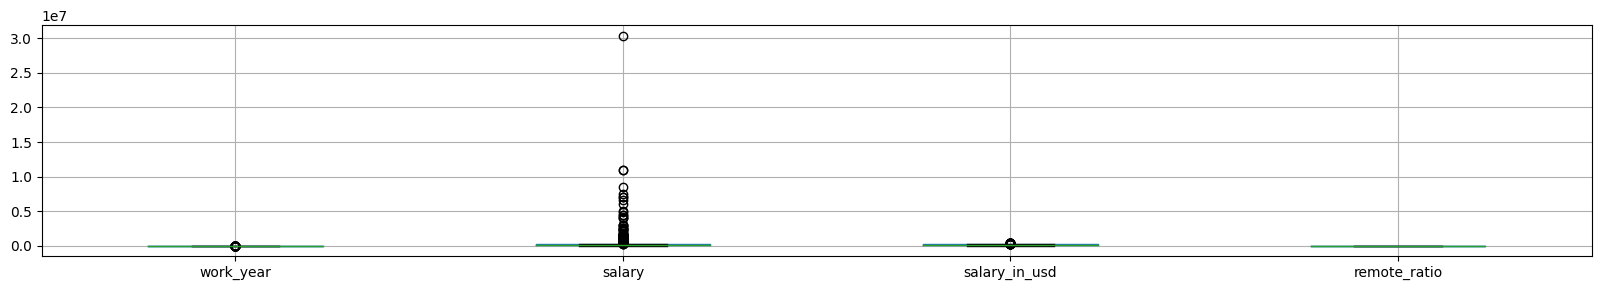

In [6]:
data2.boxplot(figsize=(20,3))

When evaluating the boxplot listed above, the only outliers appear to be in the $salary$ column. Next, I will attempt to resolve the outliers with the following lines of code.

In [7]:
Z = (data2-data2.mean())/data2.std()
Z[1:3755]

,work_year,salary,salary_in_usd,remote_ratio
1,0.905874,-0.239245,-1.705960,1.105771
2,0.905874,-0.245945,-1.777326,1.105771
3,0.905874,-0.023368,0.593597,1.105771
4,0.905874,-0.105252,-0.278649,1.105771
5,0.905874,0.046904,1.342142,-0.952306
...,...,...,...,...
3750,-3.432846,0.329481,4.352183,1.105771
3751,-1.986606,-0.059099,0.212980,1.105771
3752,-3.432846,-0.127585,-0.516534,1.105771
3753,-3.432846,-0.135029,-0.595829,1.105771


In [8]:
print('Total number of rows before removing outliers: %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Total number of rows after removing missing values: %d' % (Z2.shape[0]))

Total number of rows before removing outliers: 3755
Total number of rows after removing missing values: 0


It appears as though the outliers don't exceed the maximum or minimum.

#Checking for Duplicates:

Next, I will now check for duplicated rows.

In [9]:
dups = data.duplicated()
print('Total number of duplicate rows: %d' % (dups.sum()))

Total number of duplicate rows: 1171


There appears to be a lot of duplicated rows, so I will attempt to remove them with the following line of code.

In [10]:
print('Total number of rows before removing duplicates: %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Total number of rows after removing duplicates: %d' % (data2.shape[0]))

Total number of rows before removing duplicates: 3755
Total number of rows after removing duplicates: 2584


#Sampling:

Next, I will execute sampling to review the data. First, I'll start with the first five rows.

In [11]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Next, I will sample three rows without replacement.

In [12]:
sample = data.sample(n=3)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2236,2022,MI,FT,Data Engineer,90000,USD,90000,US,100,US,M
2560,2022,MI,FT,BI Analyst,48000,USD,48000,BR,100,BR,M
764,2023,SE,FT,Data Engineer,178500,USD,178500,US,100,US,M


Next, I will sample at one percent of the data without replacement.

In [13]:
sample = data.sample(frac=0.01, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2101,2022,SE,FT,Data Scientist,130000,USD,130000,US,0,US,M
2586,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
3096,2022,MI,FT,Data Engineer,50000,GBP,61566,GB,0,GB,M
1677,2023,SE,FT,Data Scientist,297300,USD,297300,US,100,US,M
3661,2021,SE,FT,Data Analytics Engineer,50000,USD,50000,VN,100,GB,M
2508,2022,SE,FT,Data Operations Analyst,123000,USD,123000,US,0,US,M
846,2023,MI,FT,Research Scientist,150000,USD,150000,US,100,US,M
796,2023,MI,FT,Data Analytics Manager,140000,USD,140000,US,0,US,M
3138,2020,EN,FT,Data Analyst,20000,EUR,22809,PT,100,PT,M
102,2023,SE,FT,Data Analyst,65000,USD,65000,US,0,US,M


Lastly, I will sample one percent with replacement.

In [14]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1061,2023,SE,FT,Data Manager,120000,USD,120000,US,0,US,M
235,2023,SE,FT,Data Engineer,145000,USD,145000,US,0,US,M
1096,2023,SE,FT,Data Engineer,172800,USD,172800,US,0,US,M
905,2023,SE,FT,Machine Learning Engineer,142200,USD,142200,US,0,US,M
2763,2022,SE,FT,Machine Learning Engineer,135000,USD,135000,PR,100,PR,M
3717,2021,SE,FT,Data Engineer,65000,EUR,76833,RO,50,GB,S
2895,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M
960,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M
144,2023,SE,FT,Data Analyst,138900,USD,138900,US,0,US,M
129,2023,MI,FT,Data Analytics Manager,155000,USD,155000,US,0,US,M


#Findings:

The dataset I am using for clustering doesn’t appear to contain missing values, outliers, or duplicates. The sampling lines of code confirmed the previous lines of code by randomly selecting rows and displaying the data within those rows. The dataset appeared mostly clean to begin with, and after attempting preprocessing, it appears as though that observation is correct.

#Assignment 4 Beginning

#Univariate, Bivariate, and Multivariate Data Analysis Meanings

According to aditya191251015002,

$Univariate$ $Analysis$ is, "a type of data visualization where we visualize only a single variable at a time"(geeksforgeeks, 2022).

$Bivariate$ $Analysis$ is, "the simulatneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences"(geeksforgeeks, 2022).

$Multivariate$ $Analysis$ is, "an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them"(geeksforgeeks, 2022).


#Univariate Analysis (Continuous and Categorical Variables):



In [15]:
import seaborn as sns

First, I will start by calculating the mean, standard deviation, minimum, and maximum values to analyze specific values.

In [16]:
from pandas.api.types import is_numeric_dtype


for col in data2.columns:
    if is_numeric_dtype(data2[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data2[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data2[col].min())
        print('\t Maximum = %.2f' % data2[col].max())

work_year:
	 Mean = 2022.30
	 Standard deviation = 0.69
	 Minimum = 2020.00
	 Maximum = 2023.00
salary:
	 Mean = 210365.30
	 Standard deviation = 671676.50
	 Minimum = 6000.00
	 Maximum = 30400000.00
salary_in_usd:
	 Mean = 133409.28
	 Standard deviation = 63055.63
	 Minimum = 5132.00
	 Maximum = 450000.00
remote_ratio:
	 Mean = 50.48
	 Standard deviation = 48.59
	 Minimum = 0.00
	 Maximum = 100.00


Next, I will print the features with their data type to use for the code following it.

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


Next, I will use a histogram to perform Univariate Analysis on continuous variables.

<Axes: xlabel='work_year', ylabel='Count'>

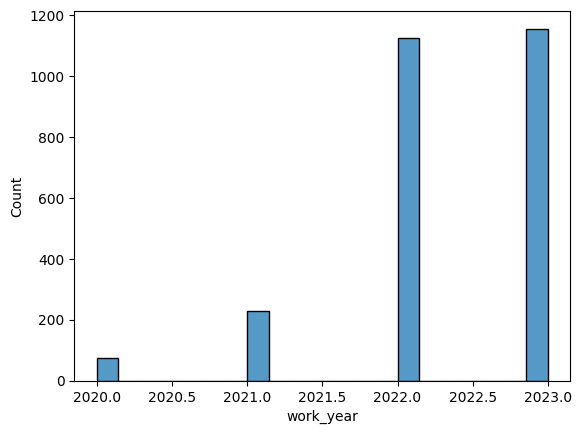

In [18]:
sns.histplot(data2['work_year'])

<Axes: xlabel='salary', ylabel='Count'>

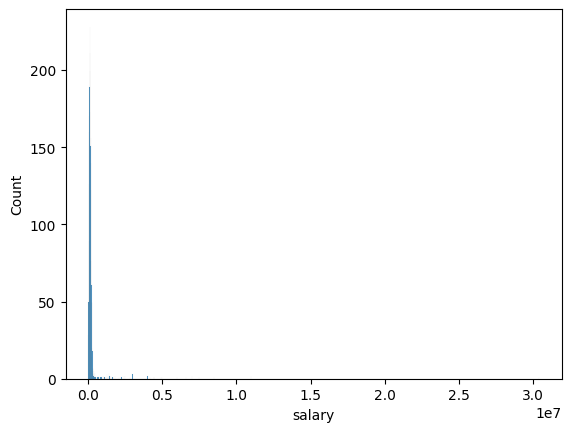

In [19]:
sns.histplot(data2['salary'])

<Axes: xlabel='salary_in_usd', ylabel='Count'>

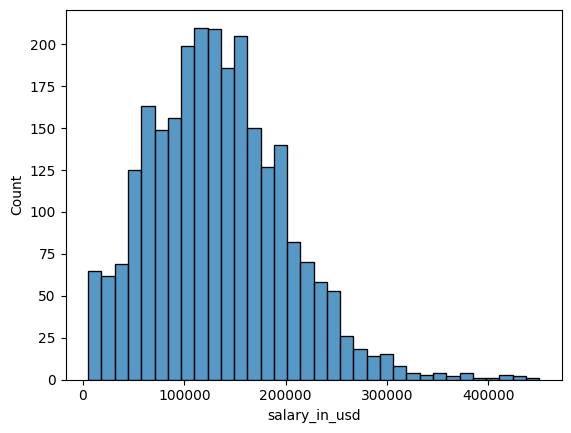

In [20]:
sns.histplot(data2['salary_in_usd'])

<Axes: xlabel='remote_ratio', ylabel='Count'>

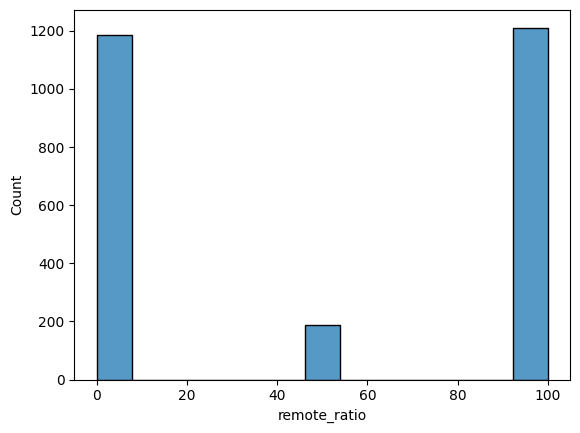

In [21]:
sns.histplot(data2['remote_ratio'])

Next, I will check for ensure there are no duplicated values.

In [22]:
data2.duplicated().sum()

0

Next, I will use the $value$ $counts$ function to analyize the categorical data in the dataset.

In [23]:
data2['experience_level'].value_counts()

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

In [24]:
data2['employment_type'].value_counts()

FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [25]:
data2['job_title'].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

In [26]:
data2['salary_currency'].value_counts()

USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [27]:
data2['employee_residence'].value_counts()

US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [28]:
data2['company_location'].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [29]:
data2['company_size'].value_counts()

M    2028
L     409
S     147
Name: company_size, dtype: int64

Next, I will use the describe function to display attributes and some of their common statistical values.

In [30]:
data2.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,2584.000000,2584,2584,2584,2.584000e+03,2584,2584.000000,2584,2584.000000,2584,2584
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,1554,2547,598,NaN,2107,NaN,1893,NaN,1929,2028
mean,2022.301084,NaN,NaN,NaN,2.103653e+05,NaN,133409.280186,NaN,50.483746,NaN,NaN
std,0.749179,NaN,NaN,NaN,8.080375e+05,NaN,67136.837329,NaN,48.163707,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,9.000000e+04,NaN,84975.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.346300e+05,NaN,130000.000000,NaN,50.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.825625e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


#Bivariate Analysis

The next line of code uses covariance and correlation to compare multiple variables.

In [31]:
print('Covariance:')
data2.cov()

Covariance:


<ipython-input-31-c23afdfd1d30>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.cov()


,work_year,salary,salary_in_usd,remote_ratio
work_year,0.561269,-6.002389e+04,1.191839e+04,-7.907996e+00
salary,-60023.891456,6.529247e+11,-2.369191e+09,1.030727e+06
salary_in_usd,11918.386766,-2.369191e+09,4.507355e+09,-2.732431e+05
remote_ratio,-7.907996,1.030727e+06,-2.732431e+05,2.319743e+03


In [32]:
print('Correlation:')
data2.corr()

Correlation:


<ipython-input-32-eedc422125ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.099153,0.236958,-0.219160
salary,-0.099153,1.000000,-0.043672,0.026485
salary_in_usd,0.236958,-0.043672,1.000000,-0.084502
remote_ratio,-0.219160,0.026485,-0.084502,1.000000


The next lines of code compares categorical v/s numerical using a bar chart.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Principal Data Scientist'),
  Text(1, 0, 'ML Engineer'),
  Text(2, 0, 'Data Scientist'),
  Text(3, 0, 'Applied Scientist'),
  Text(4, 0, 'Data Analyst'),
  Text(5, 0, 'Data Modeler'),
  Text(6, 0, 'Research Engineer'),
  Text(7, 0, 'Analytics Engineer'),
  Text(8, 0, 'Business Intelligence Engineer'),
  Text(9, 0, 'Machine Learning Engineer'),
  Text(10, 0, 'Data Strategist'),
  Text(11, 0, 'Data Engineer'),
  Text(12, 0, 'Computer Vision Engineer'),
  Text(13, 0, 'Data Quality Analyst'),
  Text(14, 0, 'Compliance Data Analyst'),
  Text(15, 0, 'Data Architec

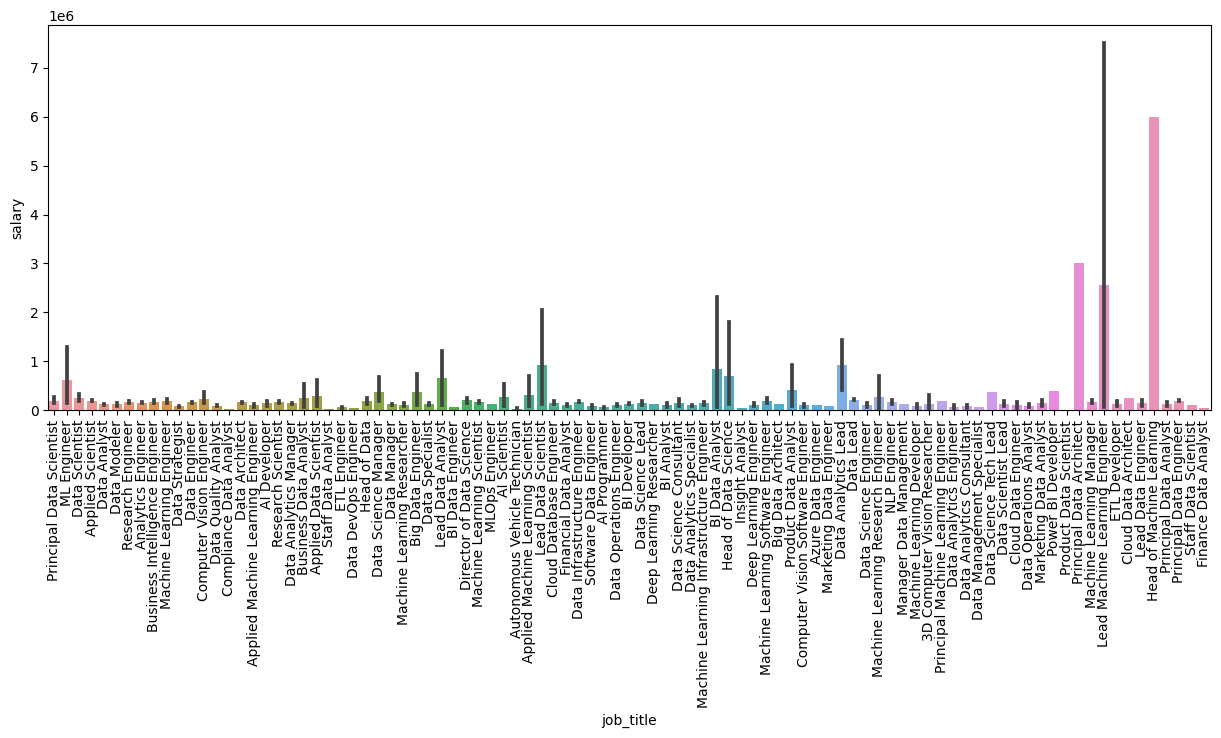

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=data['job_title'], y=data['salary'])
plt.xticks(rotation='vertical')

#Continuous vs. Continuous

Next, I will use scatter plots to compare two features.

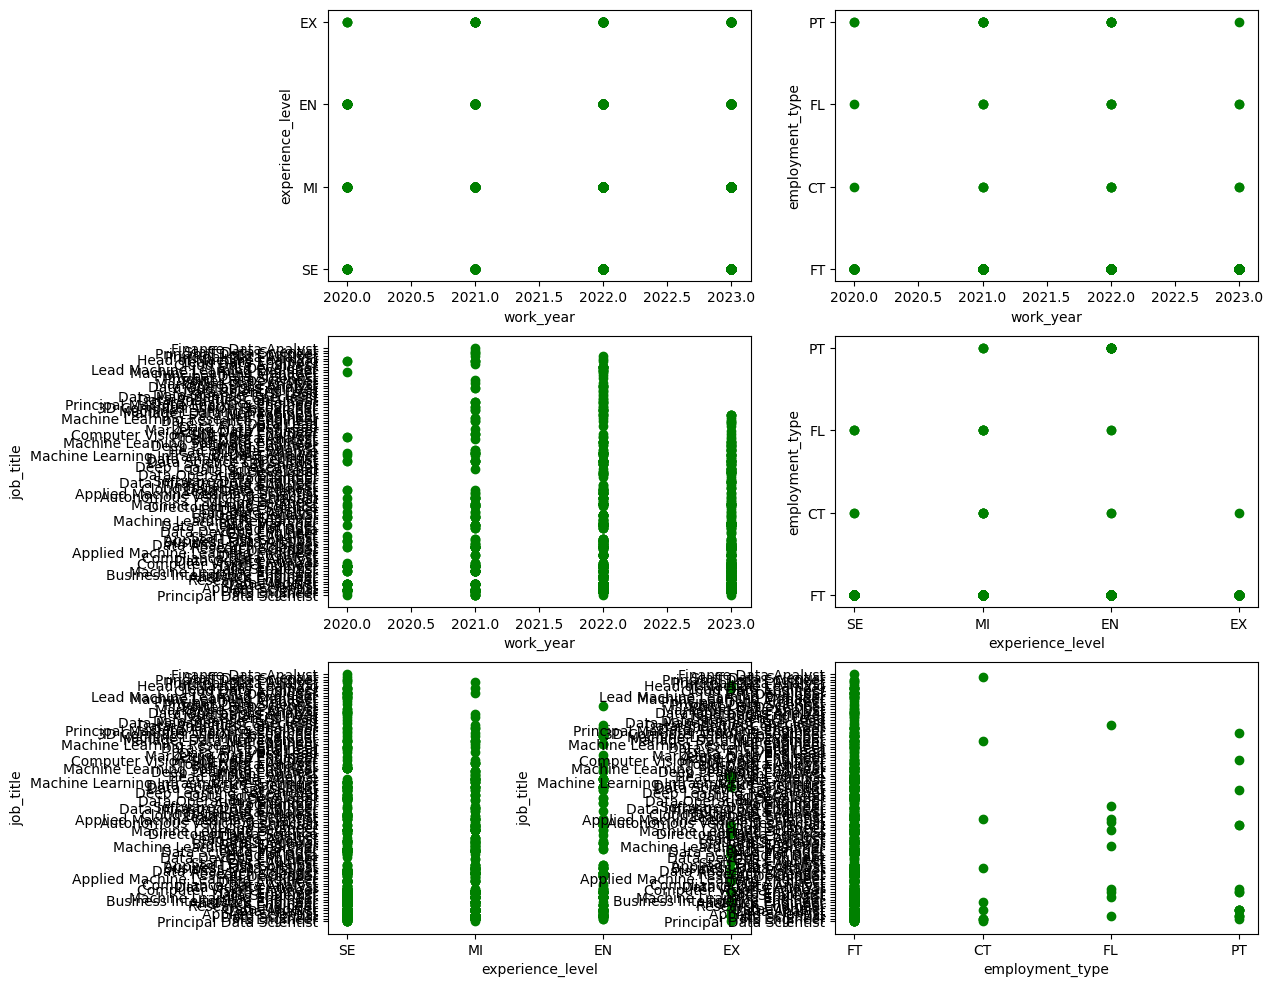

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data2[data2.columns[i]], data2[data2.columns[j]], color='green')
        axes[ax1][ax2].set_xlabel(data2.columns[i])
        axes[ax1][ax2].set_ylabel(data2.columns[j])
        index = index + 1

#Categorical vs. Categorical

Next, I will use a KDE plot to compare two categorical values.

<Axes: xlabel='remote_ratio', ylabel='Density'>

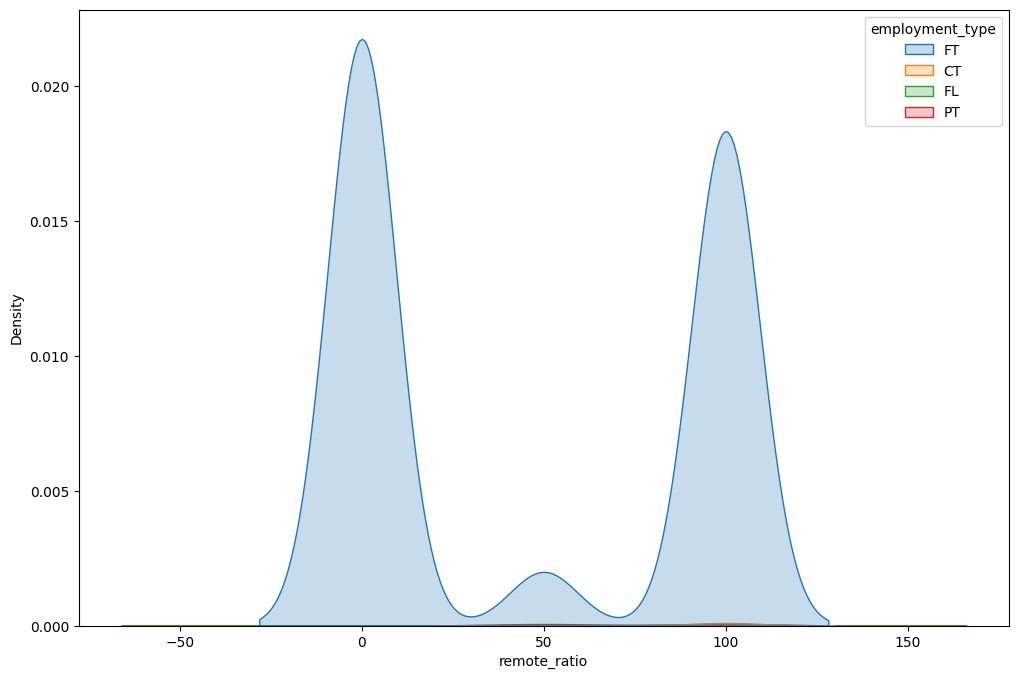

In [44]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='remote_ratio', hue='employment_type',fill=True)

Next, I will use box plot to see if any values are unequally distributed.

<Axes: xlabel='salary', ylabel='Density'>

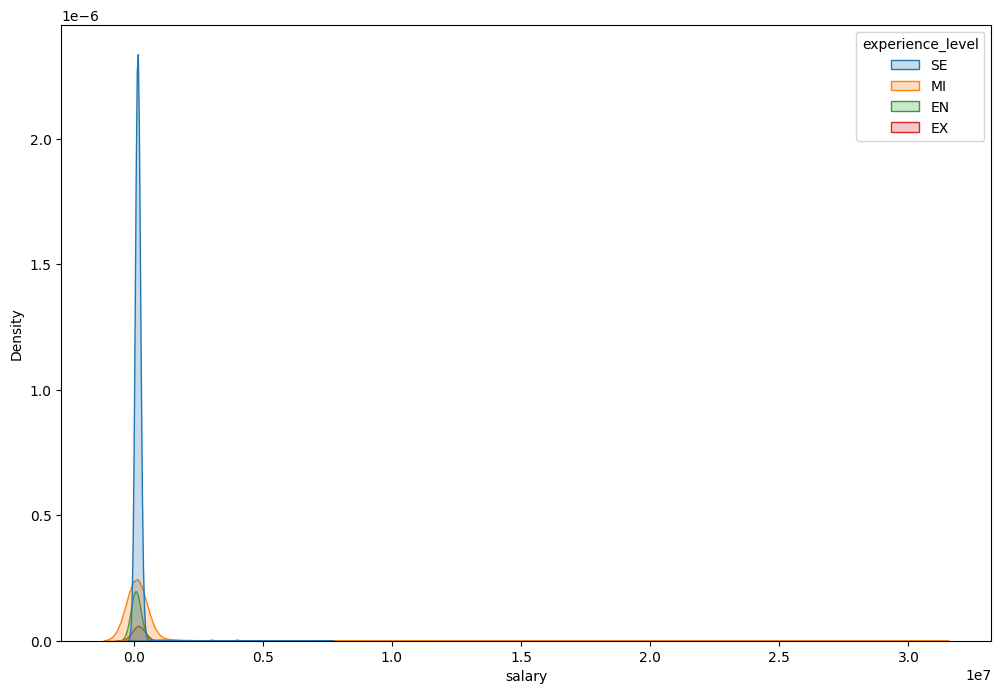

In [38]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data2,x='salary',hue='experience_level',fill=True)

<Axes: >

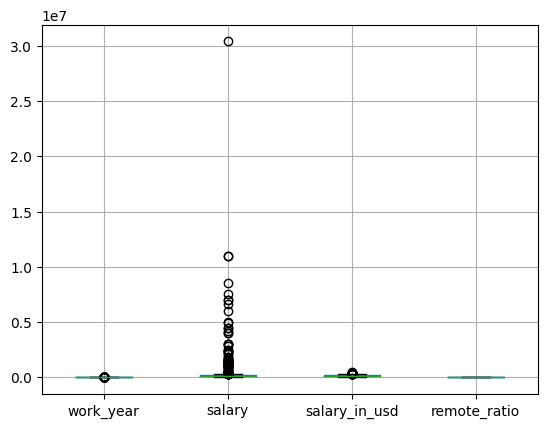

In [36]:
data2.boxplot()

#Multivariate Analysis:

Lastly, I will use a heat map to display multiple variables at the same time to analyze their comparisons.

<ipython-input-46-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

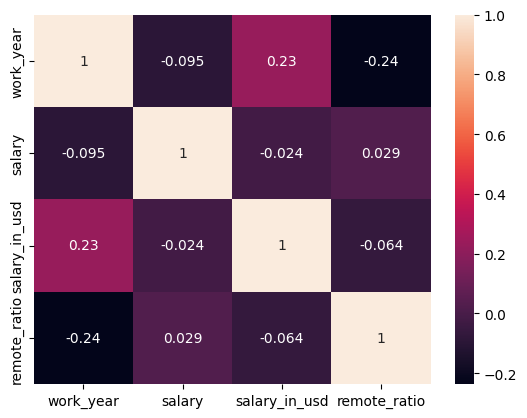

In [46]:
sns.heatmap(data.corr(), annot=True)

#Findings:

  When using visual representations of the data, it's easy to identify how specific features and attributes correlate. For instance, when examining categorical values using the KDE plot, it's easy to distinguish which values there are more of. Using the scatter plot function for this dataset appeared less useful since there were more features that ended up overlapping. Using visual representation also makes it easier to identify which features share similar values.

#References:

Chainika Thakar Blog: https://blog.quantinsti.com/data-preprocessing/

Dr. Reddy's example: https://blackboard.ecok.edu/ultra/courses/_24357_1/cl/outline

aditya191251015002. (2022, November 7). What is Univariate, Bivariate &amp; Multivariate Analysis In Data Visualisation?. GeeksforGeeks. https://www.geeksforgeeks.org/what-is-univariate-bivariate-multivariate-analysis-in-data-visualisation/

Medium.com: https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173